In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
logs = pd.read_csv('../input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv')
data = pd.read_csv('../input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
des = pd.read_csv('../input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv')

print(data.shape)
print(logs.shape)
print(des.shape)

(180519, 53)
(469977, 8)
(52, 2)


In [3]:
des.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
FIELDS,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,Shipping date (DateOrders),Shipping Mode
DESCRIPTION,: Type of transaction made,: Actual shipping days of the purchased product,: Days of scheduled delivery of the purchased...,: Earnings per order placed,: Total sales per customer made per customer,: Delivery status of orders: Advance shipping...,: Categorical variable that indicates if send...,: Product category code,: Description of the product category,: City where the customer made the purchase,: Country where the customer made the purchase,: Customer's email,: Customer name,: Customer ID,: Customer lastname,: Masked customer key,": Types of Customers: Consumer , Corporate , ...",: State to which the store where the purchase...,: Street to which the store where the purchas...,: Customer Zipcode,: Department code of store,: Department name of store,: Latitude corresponding to location of store,: Longitude corresponding to location of store,: Market to where the order is delivered : Af...,: Destination city of the order,: Destination country of the order,: Customer order code,: Date on which the order is made,: Order code,: Product code generated through the RFID reader,: Order item discount value,: Order item discount percentage,: Order item code,: Price of products without discount,: Order Item Profit Ratio,: Number of products per order,: Value in sales,: Total amount per order,: Order Profit Per Order,: Region of the world where the order is deli...,: State of the region where the order is deli...,": Order Status : COMPLETE , PENDING , CLOSED ...",: Product code,: Product category code,: Product Description,: Link of visit and purchase of the product,: Product Name,: Product Price,: Status of the product stock :If it is 1 not...,: Exact date and time of shipment,: The following shipping modes are presented ...


In [4]:
logs.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [5]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
def eda(df):
    summary = pd.DataFrame()
    summary['missing'] = df.isnull().sum()
    summary['nlevel'] = df.nunique()
    summary['dtype'] = df.dtypes
 
    
    return summary

res = eda(data)
res

,missing,nlevel,dtype
Type,0,4,object
Days for shipping (real),0,7,int64
Days for shipment (scheduled),0,4,int64
Benefit per order,0,21998,float64
Sales per customer,0,2927,float64
Delivery Status,0,4,object
Late_delivery_risk,0,2,int64
Category Id,0,51,int64
Category Name,0,50,object
Customer City,0,563,object


# Featuers with levels < 10

In [7]:
res[res['nlevel']<12].index

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Customer Country',
       'Customer Email', 'Customer Password', 'Customer Segment',
       'Department Id', 'Department Name', 'Market', 'Order Item Quantity',
       'Order Status', 'Product Description', 'Product Status',
       'Shipping Mode'],
      dtype='object')

In [8]:
for c in data.columns:
    print(data[c].value_counts().head(10) )
    print('\n')

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64


2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64


4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64


0.000000      1177
143.990005     199
72.000000      194
46.799999      188
24.000000      181
18.000000      175
63.700001      172
62.400002      168
12.000000      166
14.400000      166
Name: Benefit per order, dtype: int64


122.839996    1264
109.190002    1247
124.790001    1243
129.990005    1243
116.989998    1243
123.489998    1243
120.889999    1243
127.389999    1243
97.489998     1243
118.290001    1243
Name: Sales per customer, dtype: int64


Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64


1    98977
0    81542
Name: Late_delivery_risk, dtype: int64


17    2

# One value columns

In [9]:
one_value_cols = res[res['nlevel'] == 1].index.values
one_value_cols

array(['Customer Email', 'Customer Password', 'Product Status'],
      dtype=object)

# Columns with missing value

In [10]:
miss_cols = [c for c in data.columns if data[c].isnull().any()]
miss_cols

['Customer Lname', 'Customer Zipcode', 'Order Zipcode', 'Product Description']

In [11]:
low_level_cols = [c for c in data.columns if (data[c].nunique()<=10) and (data[c].nunique()>1)]
low_level_cols

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Delivery Status',
 'Late_delivery_risk',
 'Customer Country',
 'Customer Segment',
 'Market',
 'Order Item Quantity',
 'Order Status',
 'Shipping Mode']

In [12]:
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['ship_ord_diff'] = (data['shipping date (DateOrders)'] - data['order date (DateOrders)']).dt.days 
data['order_dt'] = data['order date (DateOrders)'].dt.date
data['ship_dow'] = data['shipping date (DateOrders)'].dt.dayofweek
data['ship_hr'] = data['shipping date (DateOrders)'].dt.hour
data['ship_wkd'] = (data['shipping date (DateOrders)'].dt.dayofweek>=5).astype('int')

data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,ship_ord_diff,order_dt,ship_dow,ship_hr,ship_wkd
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,3,2018-01-31,5,22,1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,5,2018-01-13,3,12,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,4,2018-01-13,2,12,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,3,2018-01-13,1,11,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2,2018-01-13,0,11,0


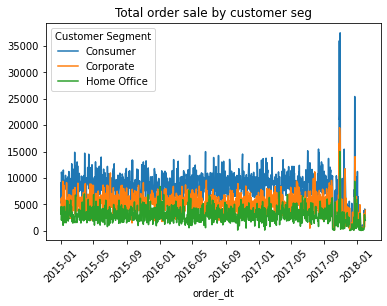

In [13]:
data.sample(int(len(data)*0.5)).groupby(['order_dt','Customer Segment'])['Sales'].sum().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Total order sale by customer seg')
plt.show()

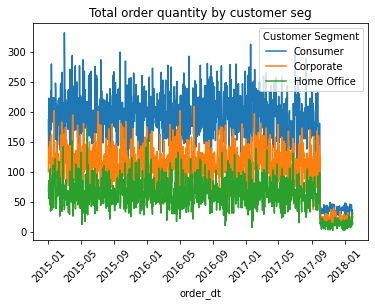

In [14]:
data.groupby(['order_dt','Customer Segment'])['Order Item Quantity'].sum().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Total order quantity by customer seg')
plt.show()

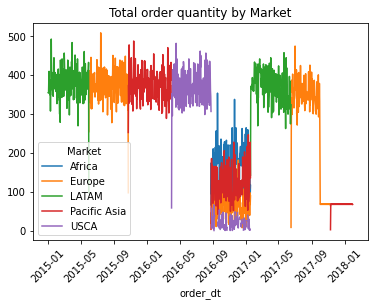

In [15]:
data.groupby(['order_dt','Market'])['Order Item Quantity'].sum().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Total order quantity by Market')
plt.show()

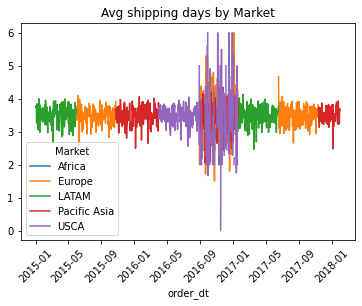

In [16]:
data.groupby(['order_dt','Market'])['Days for shipping (real)'].mean().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Avg shipping days by Market')
plt.show()


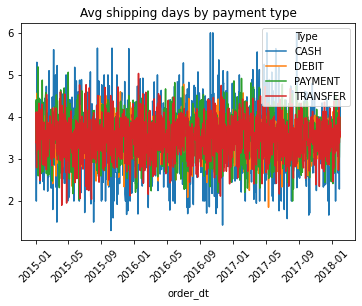

In [17]:
data.groupby(['order_dt','Type'])['Days for shipping (real)'].mean().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Avg shipping days by payment type')
plt.show()


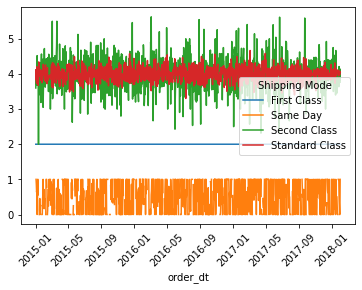

In [18]:
data.groupby(['order_dt','Shipping Mode'])['Days for shipping (real)'].mean().unstack().plot()
plt.xticks(rotation = 45)
plt.show()


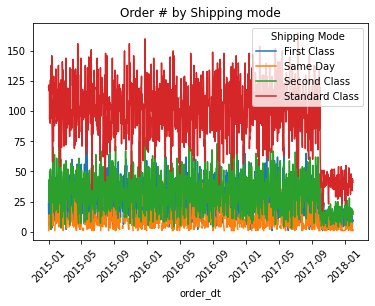

In [19]:
data.groupby(['order_dt','Shipping Mode'])['Order Id'].size().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Order # by Shipping mode')
plt.show()

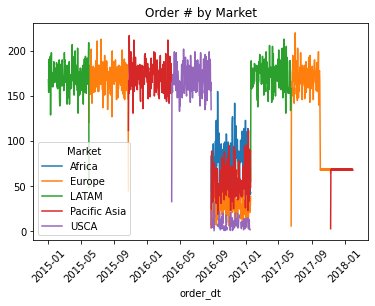

In [20]:
data.groupby(['order_dt','Market'])['Order Id'].size().unstack().plot()
plt.xticks(rotation = 45)
plt.title('Order # by Market')
plt.show()

In [21]:
data.groupby('Department Name')['Late_delivery_risk'].mean()

Department Name
Apparel               0.547471
Book Shop             0.565432
Discs Shop            0.544423
Fan Shop              0.547748
Fitness               0.555466
Footwear              0.547263
Golf                  0.547803
Health and Beauty     0.558011
Outdoors              0.554925
Pet Shop              0.589431
Technology            0.550171
Name: Late_delivery_risk, dtype: float64

In [22]:
data.groupby('Customer Segment')['Late_delivery_risk'].mean()

Customer Segment
Consumer       0.548084
Corporate      0.547227
Home Office    0.550704
Name: Late_delivery_risk, dtype: float64

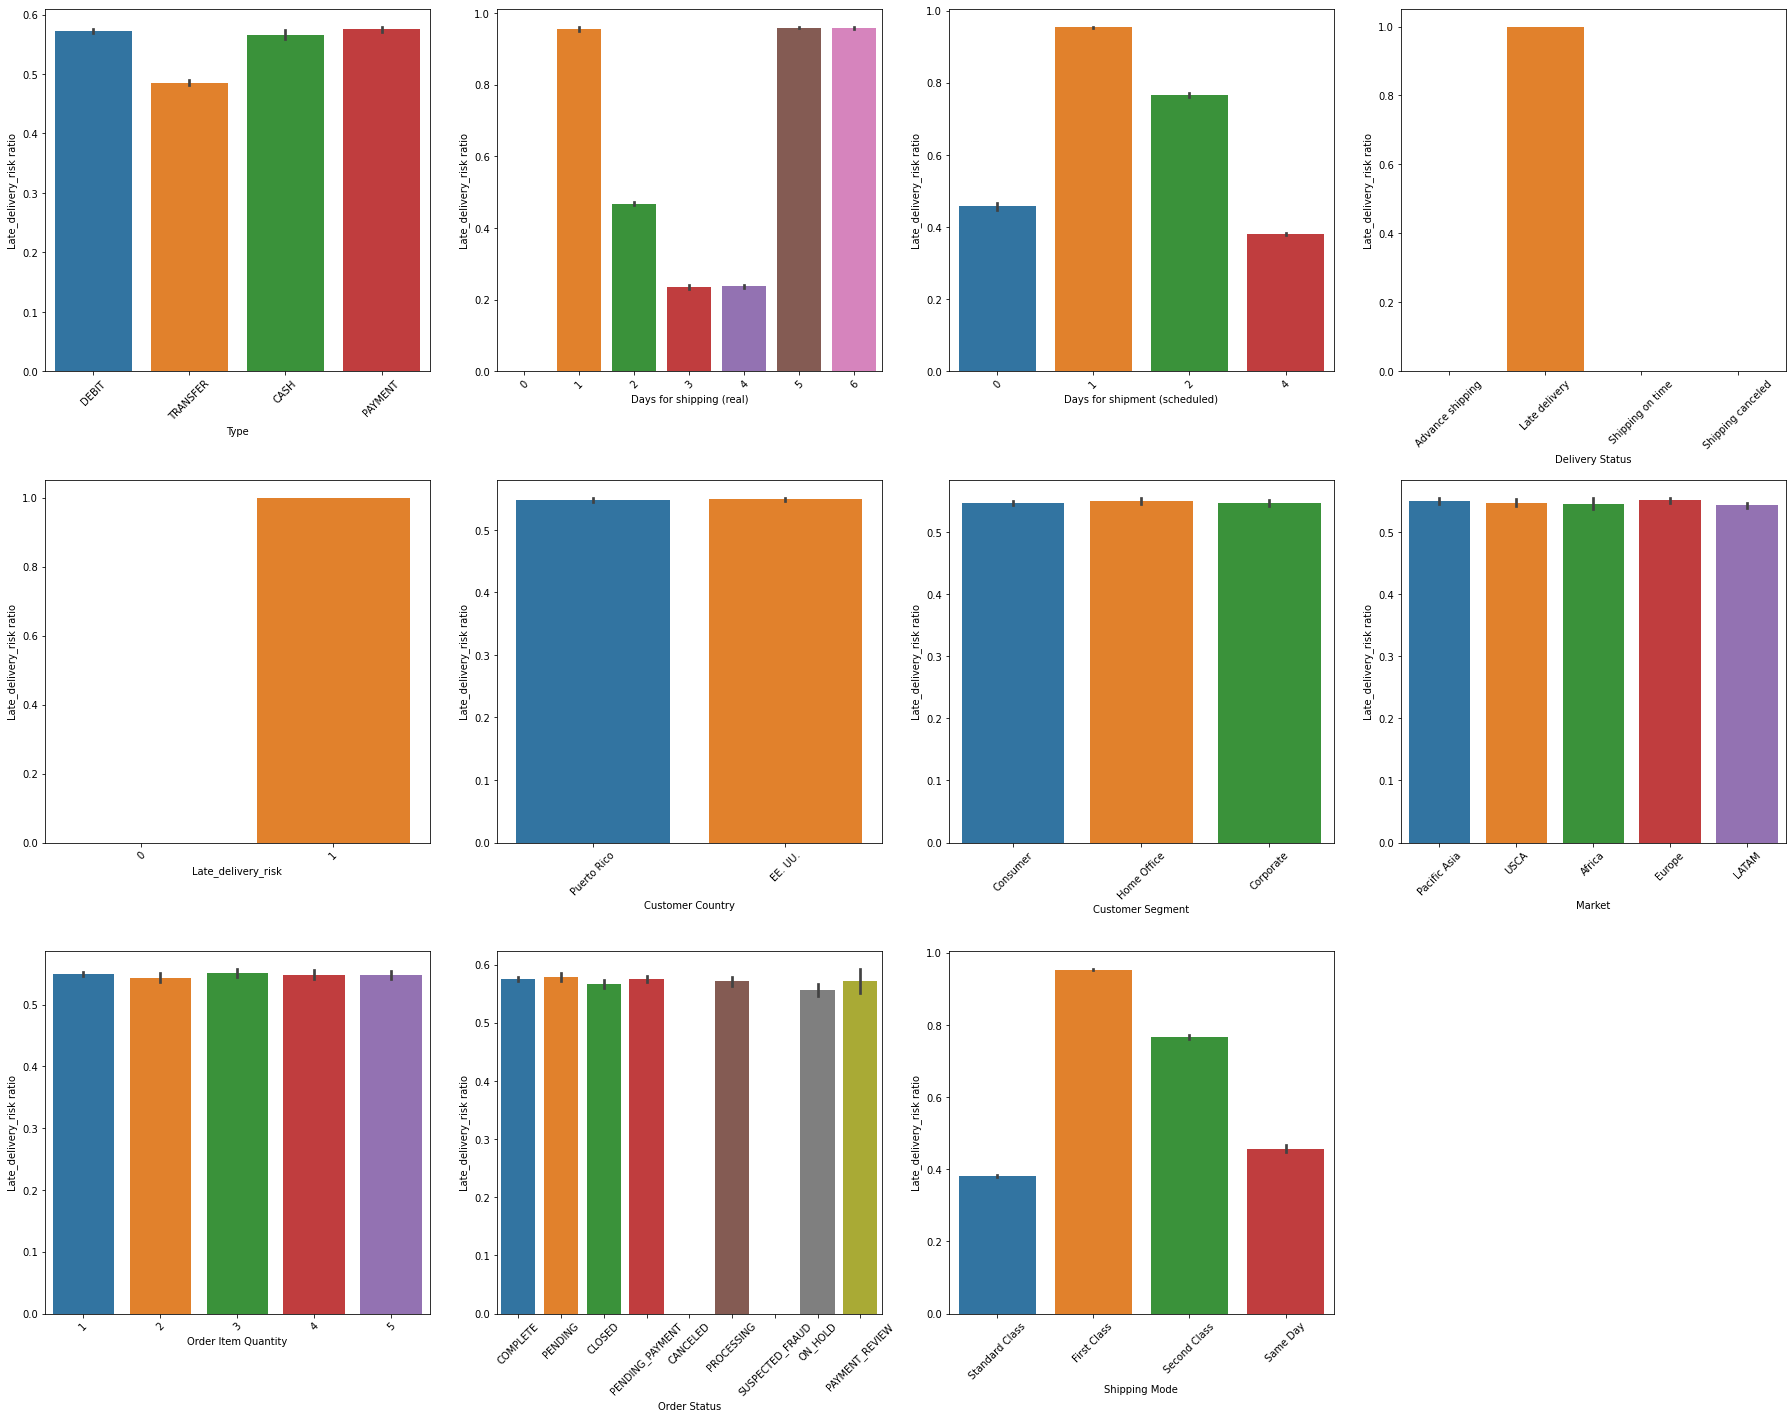

In [23]:
def draw_barplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(25,25))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        ax=sns.barplot(x = feature, y = dataframe['Late_delivery_risk'], data = dataframe)     
        ax.set(xlabel=feature)
        ax.set(ylabel='Late_delivery_risk ratio')
        plt.xticks(rotation=45)
    fig.tight_layout()  
    
    plt.show()
    
draw_barplot(data, low_level_cols,4,4)

In [24]:
data.corr()['Late_delivery_risk'].abs().sort_values(ascending = False)

Late_delivery_risk               1.000000
Days for shipping (real)         0.401415
ship_ord_diff                    0.377516
Days for shipment (scheduled)    0.369352
ship_hr                          0.043390
Order Zipcode                    0.014131
Order Item Total                 0.003791
Sales per customer               0.003791
Order Profit Per Order           0.003727
Benefit per order                0.003727
Sales                            0.003564
Customer Zipcode                 0.003148
Order Item Profit Ratio          0.002316
Product Price                    0.002175
Order Item Product Price         0.002175
Longitude                        0.001915
Category Id                      0.001752
Product Category Id              0.001752
Product Card Id                  0.001490
Order Item Cardprod Id           0.001490
Order Customer Id                0.001484
Customer Id                      0.001484
Order Item Id                    0.001376
Order Id                         0

In [25]:
cat_cols = [c for c in data.columns if data[c].dtype == 'object']
cat_cols

['Type',
 'Delivery Status',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Image',
 'Product Name',
 'Shipping Mode',
 'order_dt']

In [26]:
data.iloc[0:2,2:5]
data.loc[data['Benefit per order']<100, 'Type']

data.groupby('Order Status')['Benefit per order'].agg(['mean','std'])

data.groupby('Order Status').agg({'Benefit per order':'mean','Sales':'std'}).reset_index()

,Order Status,Benefit per order,Sales
0,CANCELED,20.407809,126.402898
1,CLOSED,23.347323,134.193693
2,COMPLETE,22.217407,134.212370
3,ON_HOLD,21.308960,131.587266
4,PAYMENT_REVIEW,22.941780,131.822974
5,PENDING,21.541793,127.671030
6,PENDING_PAYMENT,21.184230,129.852731
7,PROCESSING,22.592725,135.022487
8,SUSPECTED_FRAUD,20.959308,132.421653


In [27]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

# Pre-processing

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

fea = ['Type',
       'Days for shipment (scheduled)','Product Name', 'Product Price',
       'Product Status',  'Shipping Mode',
       #'ship_ord_diff', 
       'Benefit per order', 'Sales per customer',
       'Order Item Discount', 'Order Item Discount Rate', 
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Category Name', 'Customer City',
       'Customer Country','ship_dow', 'ship_wkd', 'ship_hr',
      ]



for c in ['Product Name', 'Type','Category Name', 'Customer City','Customer Country','Shipping Mode']:
    data[c] = le.fit_transform(data[c])
    
data[fea].head()    

,Type,Days for shipment (scheduled),Product Name,Product Price,Product Status,Shipping Mode,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Category Name,Customer City,Customer Country,ship_dow,ship_wkd,ship_hr
0,1,4,78,327.75,0,3,91.250000,314.640015,13.110000,0.04,327.75,0.29,1,327.75,314.640015,40,66,1,5,1,22
1,3,4,78,327.75,0,3,-249.089996,311.359985,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,40,66,1,3,0,12
2,0,4,78,327.75,0,3,-247.779999,309.720001,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,40,452,0,2,0,12
3,1,4,78,327.75,0,3,22.860001,304.809998,22.940001,0.07,327.75,0.08,1,327.75,304.809998,40,285,0,1,0,11
4,2,4,78,327.75,0,3,134.210007,298.250000,29.500000,0.09,327.75,0.45,1,327.75,298.250000,40,66,1,0,0,11


In [29]:
from sklearn.model_selection import train_test_split

X  = data[fea]
y = data.Late_delivery_risk

X_tr, X_val, y_tr, y_val = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)

print(X_tr.shape)
print(X_val.shape)

X_tr.head()

(144415, 21)
(36104, 21)


,Type,Days for shipment (scheduled),Product Name,Product Price,Product Status,Shipping Mode,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Category Name,Customer City,Customer Country,ship_dow,ship_wkd,ship_hr
116587,3,1,71,59.990002,0,0,1.750000,174.570007,5.400000,0.03,59.990002,0.01,3,179.970001,174.570007,12,285,0,5,1,16
36340,2,2,56,129.990005,0,2,38.220001,109.190002,20.799999,0.16,129.990005,0.35,1,129.990005,109.190002,34,88,0,0,0,11
175763,1,1,56,129.990005,0,0,35.099998,129.990005,0.000000,0.00,129.990005,0.27,1,129.990005,129.990005,34,66,1,3,0,7
96918,1,1,59,50.000000,0,0,3.960000,198.000000,2.000000,0.01,50.000000,0.02,4,200.000000,198.000000,47,252,0,6,1,15
71197,3,1,71,59.990002,0,0,5.220000,260.959992,38.990002,0.13,59.990002,0.02,5,299.950012,260.959992,12,114,0,1,0,13


In [30]:
y_tr.value_counts()

1    79180
0    65235
Name: Late_delivery_risk, dtype: int64

In [31]:
y_val.value_counts()

1    19797
0    16307
Name: Late_delivery_risk, dtype: int64

# Modeling - Late_delivery_risk

In [32]:
import lightgbm  as lgb

clf = lgb.LGBMClassifier(

    n_estimators = 1500,
    
    learning_rate = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    importance_type = 'gain',
    reg_alpha = 1,
)

clf.fit(X_tr,y_tr,eval_set = [(X_tr, y_tr),(X_val, y_val)], early_stopping_rounds = 50, verbose = 100,
        eval_metric = ['auc'])



[100]	training's auc: 0.810385	training's binary_logloss: 0.509376	valid_1's auc: 0.780619	valid_1's binary_logloss: 0.52214
[200]	training's auc: 0.832489	training's binary_logloss: 0.498307	valid_1's auc: 0.784623	valid_1's binary_logloss: 0.520225
[300]	training's auc: 0.846354	training's binary_logloss: 0.489357	valid_1's auc: 0.78584	valid_1's binary_logloss: 0.519832
[400]	training's auc: 0.857989	training's binary_logloss: 0.48036	valid_1's auc: 0.787597	valid_1's binary_logloss: 0.518854
[500]	training's auc: 0.867754	training's binary_logloss: 0.472256	valid_1's auc: 0.788791	valid_1's binary_logloss: 0.518242
[600]	training's auc: 0.876808	training's binary_logloss: 0.464236	valid_1's auc: 0.790393	valid_1's binary_logloss: 0.51748
[700]	training's auc: 0.885034	training's binary_logloss: 0.456617	valid_1's auc: 0.79178	valid_1's binary_logloss: 0.516481
[800]	training's auc: 0.891595	training's binary_logloss: 0.449309	valid_1's auc: 0.792406	valid_1's binary_logloss: 0.5159

LGBMClassifier(colsample_bytree=0.8, importance_type='gain', n_estimators=1500,
               reg_alpha=1, subsample=0.8)

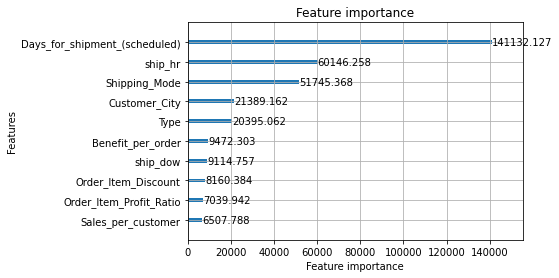

In [33]:
lgb.plot_importance(clf, max_num_features=10)
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

print('accuracy score: \n', accuracy_score(y_val, clf.predict(X_val)), '\n')

print('auc score: \n', roc_auc_score(y_val, clf.predict_proba(X_val)[:,1]), '\n')

print('classification report \n', classification_report(y_val, clf.predict(X_val)), '\n')

print('confusion matrix \n', confusion_matrix(y_val, clf.predict(X_val)), '\n')

accuracy score: 
 0.7189231110126302 

auc score: 
 0.7924444564466453 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.84      0.73     16307
           1       0.83      0.62      0.71     19797

    accuracy                           0.72     36104
   macro avg       0.74      0.73      0.72     36104
weighted avg       0.74      0.72      0.72     36104
 

confusion matrix 
 [[13737  2570]
 [ 7578 12219]] 



In [35]:
data.groupby('Shipping Mode')['Late_delivery_risk'].mean()

Shipping Mode
0    0.953225
1    0.457430
2    0.766328
3    0.380717
Name: Late_delivery_risk, dtype: float64